In [214]:
import numpy as np
import matplotlib.pyplot as pyplt

M = 9
SIZE = 9

In [215]:
def create_dataset(size):
  X = np.linspace(0, 1, size)
  Y = func(X) + np.random.normal(loc=0, scale=0.5, size=X.shape)
  return (X, Y)

def func(x):
  return np.sin(2 * np.pi * x)

(X, Y) = create_dataset(SIZE)

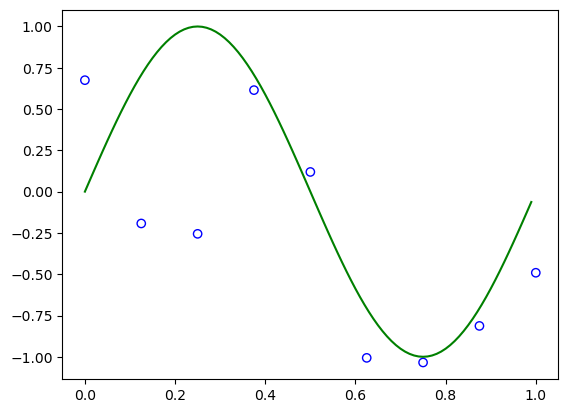

In [216]:
t = np.arange(0.0, 1.0, 0.01)
s = func(t)

fig, ax = pyplt.subplots()
ax.plot(t, s, 'g')
ax.scatter(X, Y, facecolor="none", edgecolors="b")

fig.savefig("seed.png")
pyplt.show()

In [217]:
class PolynomialCurveRegression:
    def __init__(self, M=0):
        self.M = M
        self.parameter = np.zeros(M + 1)

    def fit(self, X: np.ndarray, Y: np.ndarray):
        X_prepared = np.zeros((self.M+1, self.M+1))
        Y_prepared = np.array([(Y*X**i).sum()/(self.M) for i in range(self.M+1)])
        for j in range(self.M+1):
            X_prepared[j] = np.array([(X**(i+j)).sum()/(self.M) for i in range(self.M+1)])
        X_prepared_inv = np.linalg.inv(X_prepared)
        self.parameter = X_prepared_inv.dot(Y_prepared)

    def predict(self, X: np.ndarray):
        X_matrix = np.array([[x ** i for i in range(self.M + 1)] for x in X])
        return X_matrix.dot(self.parameter)


model = PolynomialCurveRegression(M)
model.fit(X, Y)


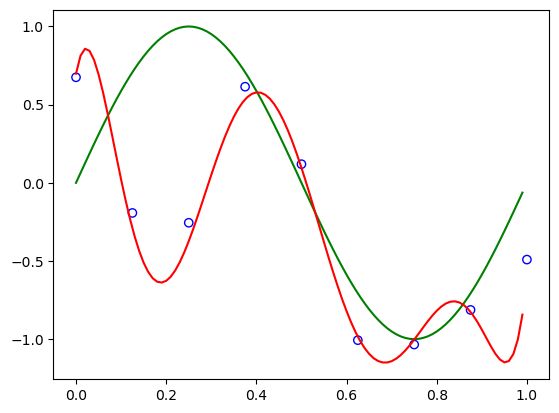

In [218]:
t = np.arange(0.0, 1.0, 0.01)
s = func(t)

fig, ax = pyplt.subplots()
ax.plot(t, s, 'g')
ax.scatter(X, Y, facecolor="none", edgecolors="b")
ax.plot(t, model.predict(t), 'r')

fig.savefig("result.png")
pyplt.show()